# Recommender System

## Yousof Rahimian

### create a recommender system that allows users to input a movie they like (in the data set) and recommends ten other movies for them to watch.



#### Outline
- Building a simple Movie Recommendation System using the MovieLens dataset
- Download the dataset from https://grouplens.org/datasets/movielens/
- Copy the codes from https://analyticsindiamag.com/how-to-build-your-first-recommender-system-using-python-movielens-dataset/


### The data consists of the following datasets:
- UserId: ID for the user who rates the movies 
- movieId: the ID of Movies that is rated 
- rating: the rating given by the user of that particular movies
- timesteps: time at which the rating was recorded
- title: corresponding title
- genres: genre of each movie  


#### Import and clean data

In [1]:
#Loading the data
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('ratings.csv')
data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
movie_titles_genre = pd.read_csv("movies.csv")
movie_titles_genre.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
data = data.merge(movie_titles_genre,on='movieId', how='left')
data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [5]:
# find out the average rating for each and every movie in the dataset
Average_ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
Average_ratings.head(10)

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
"'burbs, The (1989)",3.176471
'night Mother (1986),3.000000
(500) Days of Summer (2009),3.666667


In [6]:
#Find out the total ratings cast for each movie
Average_ratings['Total Ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [7]:
# Sorting values according to the 'Total Ratings'
moviemat = data.pivot_table(index ='userId',
              columns ='title', values ='rating')
  
moviemat.head()
  
Average_ratings.sort_values('Total Ratings', ascending = False).head(10)

,rating,Total Ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
  
sns.set_style('white')
%matplotlib inline

<AxesSubplot:>

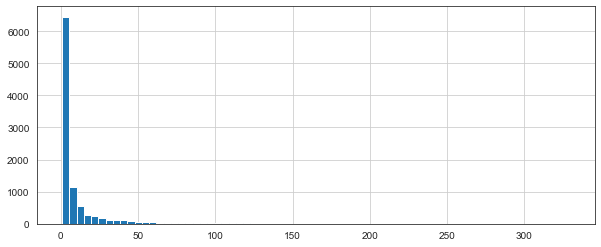

In [9]:

# plot graph of 'Total Ratings column'
plt.figure(figsize =(10, 4))
  
Average_ratings['Total Ratings'].hist(bins = 70)

<AxesSubplot:>

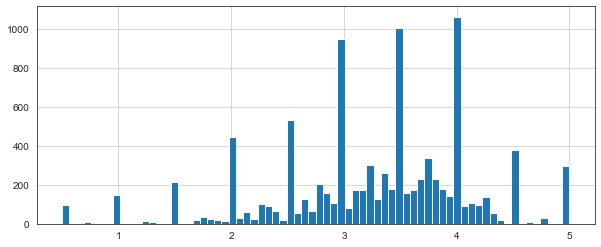

In [10]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))
  
Average_ratings['rating'].hist(bins = 70)

# Building The Recommender

- will create a table where the rows are 'userIds' and the columns represent the 'movies'.
- The values of the matrix represent the rating for each movie by each user.

In [11]:
#Calculating The Correlation
movie_user = data.pivot_table(index='userId',columns='title',values='rating')
movie_user.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [12]:
movie_user.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [13]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Select a movie to test our recommender system
#Select 'GoldenEye (1995)' movie to test the recommender system
correlations = movie_user.corrwith(movie_user['GoldenEye (1995)'])
correlations.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.395944
'night Mother (1986)                            NaN
(500) Days of Summer (2009)               -0.345238
*batteries not included (1987)            -0.755929
dtype: float64

In [15]:
#Remove all the empty values and merge the total ratings to the correlation table.
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation.head()

,Correlation,Total Ratings
title,,
"'burbs, The (1989)",0.395944,17
(500) Days of Summer (2009),-0.345238,42
*batteries not included (1987),-0.755929,7
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),1.000000,14


# Testing The Recommendation System

In [16]:
#Filter all the movies with a correlation value to 'GoldenEye (1995)' and with at least 100 ratings.
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()


In [17]:
#merge the movies dataset for verifying the recommendations
recc = recc.merge(movie_titles_genre,on='title', how='left')
recc.head(10)

,title,Correlation,Total Ratings,movieId,genres
0,GoldenEye (1995),1.000000,132,10,Action|Adventure|Thriller
1,Ocean's Eleven (2001),0.607612,119,4963,Crime|Thriller
2,Good Will Hunting (1997),0.538349,141,1704,Drama|Romance
3,Men in Black (a.k.a. MIB) (1997),0.500313,165,1580,Action|Comedy|Sci-Fi
4,Pirates of the Caribbean: The Curse of the Bla...,0.497200,149,6539,Action|Adventure|Comedy|Fantasy
5,Clear and Present Danger (1994),0.478668,110,349,Action|Crime|Drama|Thriller
6,Mission: Impossible (1996),0.467352,162,648,Action|Adventure|Mystery|Thriller
7,Crimson Tide (1995),0.464266,103,161,Drama|Thriller|War
8,X-Men (2000),0.441027,133,3793,Action|Adventure|Sci-Fi
9,Heat (1995),0.420222,102,6,Action|Crime|Thriller


- The highest correlation to GoldenEye is GoldenEye itself
- The movies such as The Oceans Eleven (2001), Good Will Hunting (1997), and Men in Black (a.k.a. MIB) (1997) show high correlation with GoldenEye